## 本篇內容以分析音樂頻道為主，透過YouTube官方提供的API進行資料的撈取

### 資料分析流程

網址：https://developers.google.com/youtube/v3/docs

網站提供多種不同的程式語言及參考資料。

Week#01：資料專案的起手式 - 資料收集與問題定義

Week#02：了解資料欄位及處理

Week#03：資料清理及BI工具視覺化呈現

Week#04：聚焦特定的視覺化呈現(資料呈現)

Week#05：專案收尾與驗收


本篇以Python為主進行撰寫，其內容如下。

## 導入需要的package以利後續使用

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 設定需要的變數
需要先到此網址開啟服務(YouTube Data API v3):https://console.cloud.google.com/welcome?project=youtube-data-api-test-352306&hl=zh-tw

開啟後參考此網址，便可開始撈取數據：https://developers.google.com/youtube/v3/docs/channels/list

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build('youtube', 'v3', developerKey = api_key)

## 初步設定好後可以測試，並利用以下JsonFormatter更清楚的查看頻道欄位資訊

透過回傳test_get_channel_stats這個fun，回傳response可以查到我們所設定的part的所有欄位資訊。

request使用說明(Channels)：https://developers.google.com/youtube/v3/docs/channels/list

JsonFormatter：https://jsonformatter.curiousconcept.com/#

In [19]:
# channel_id = 'UCln9P4Qm3-EAY4aiEPmRwEA' # Ado
# def test_get_channel_stats(youtube, channel_id):
    
#     request = youtube.channels().list(
#         part='snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations',
#         id=channel_id)
#     response = request.execute()
#     return response

In [16]:
# test_get_channel_stats(youtube, channel_id) #由於欄位過長，故將其註解掉

## 測試並了解欄位後，也可一次查詢不同頻道的資料

In [3]:
channel_ids = ['UCln9P4Qm3-EAY4aiEPmRwEA', # Ado
               'UCvpredjG93ifbCP1Y77JyFA', # YOASOBI1
               'UCPKlrgZXnnb89nSeITvTdGA', # 星野源
               'UC2JzylaIF8qeowc7-5VwwmA', # 美波
               'UCAYrMNl92jw6cpjdpBP8JyA', # Ru's Paino Ru味春捲
               'UCI7ktPB6toqucpkkCiolwLg', # Pan Paino1
               'UCyjuFsbclXyntSRMBAILzbw', # 2CELLOS
               'UC9zY_E8mcAo_Oq772LEZq8Q', # The First Take
               'UCDbQblY1XASbgqOXmy6FOFQ', # kobasolo
               'UCQVhrypJhw1HxuRV4gX6hoQ', # あいみょん
               'UCmKurapML4BF9Bjtj4RbvXw', # The Paino Guys
               'UCcE10s4MFy4eed7q7QkonZg', # First To Elecen
               'UCxyzciBLt1Hyw06dlqwAIkw', # Joe Hisaishi Official
               'UC7S48XRADBqamQbgLxpBFcQ', # 周興哲
               'UCRIgIJQWuBJ0Cv_VlU3USNA', # ヨルシカ / n-buna Official
               'UC8CU5nVhCQIdAGrFFp4loOQ' # 周杰倫
              ]

## 此正式擷取所需要的資料，並將存取的資料存成music_channel

In [4]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    requests = youtube.channels().list(
        part="snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations",
        id = ','.join(channel_ids))
    response = requests.execute()
    
#     return response
# 若以找回到欄位再取消註解
    for i in range(len(response['items'])):
        data = dict(ChannelTitle = response['items'][i]['snippet']['title'], # 頻道名稱
                    ChannelDescription = response['items'][i]['snippet']['description'], # 頻道介紹
                    ChannelPublished = response['items'][i]['snippet']['publishedAt'], # 頻道創建日期
                    Country = '', # 頻道位置
                    Subscribers = response['items'][i]['statistics']['subscriberCount'], # 訂閱人數
                    TotalViews = response['items'][i]['statistics']['viewCount'], # 總觀看人數
                    Playlist = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'], # 總上傳影片id
                    VideoCount = response['items'][i]['statistics']['videoCount'], # 頻道數量
                    ChannelTopic = response['items'][i]['topicDetails']['topicCategories'], # 頻道類型
                    ChannelImage = response['items'][i]['snippet']['thumbnails']['high']['url'], # 頻道圖片
                    Keywords = '')
        if 'keywords' not in response['items'][i]['brandingSettings']['channel']:
            data['Keywords'] == ''
        else:
            data['Keywords'] = response['items'][i]['brandingSettings']['channel']['keywords']
        if 'country' in response['items'][i]['snippet']:data['Country'] = response['items'][i]['snippet']['country']
        all_data.append(data)
    return all_data

In [5]:
music_channel = get_channel_stats(youtube, channel_ids)
# get_channel_stats(youtube, channel_ids)

## 轉成dataframe的形式方便查看

In [6]:
channel_data = pd.DataFrame(music_channel)
channel_data

,ChannelTitle,ChannelDescription,ChannelPublished,Country,Subscribers,TotalViews,Playlist,VideoCount,ChannelTopic,ChannelImage,Keywords
0,ヨルシカ / n-buna Official,ヨルシカ / n-buna official channel,2013-03-22T09:47:38Z,,2580000,1465894954,UURIgIJQWuBJ0Cv_VlU3USNA,51,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu_b_-qhgW9Ix681...,
1,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30T15:34:30Z,JP,3010000,1435937011,UUDbQblY1XASbgqOXmy6FOFQ,500,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
2,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05T11:51:17.905563Z,JP,6960000,2521573578,UU9zY_E8mcAo_Oq772LEZq8Q,449,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu_bRdzxCJQzBxWF...,
3,周杰倫 Jay Chou,Jay Chou 周杰倫\n\n“New King of Asian Pop” — Time...,2019-10-29T09:36:29.28464Z,TW,2710000,3479411546,UU8CU5nVhCQIdAGrFFp4loOQ,22,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/OvyupgLYH05byQQoYNw6BtXo...,
4,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27T15:21:51Z,TW,3430000,540223603,UUI7ktPB6toqucpkkCiolwLg,566,[https://en.wikipedia.org/wiki/Classical_music...,https://yt3.ggpht.com/ytc/AMLnZu84_Satr9fc_VK7...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...
5,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17T21:02:43Z,HR,6320000,1633128098,UUyjuFsbclXyntSRMBAILzbw,213,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...,2CELLOS Luka Sulic Stjepan Hauser Two Cellos
6,Joe Hisaishi Official,久石譲のYouTube公式チャンネルです。Official YouTube channel ...,2017-01-27T04:07:02Z,JP,884000,141930811,UUxyzciBLt1Hyw06dlqwAIkw,51,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/6pJyAmpgkwyRL5b3JCABfxOk...,
7,First To Eleven,"First to Eleven, Andie Case & Brooke Surgener ...",2015-12-08T14:32:23Z,US,1470000,429229469,UUcE10s4MFy4eed7q7QkonZg,323,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/Xsyf4kJrHNMZl8ZJD-2wSWe_...,"""first to eleven"" ""first to eleven youtube"" ""y..."
8,Ado,元気です。,2018-08-18T02:02:50Z,JP,4370000,1625463501,UUln9P4Qm3-EAY4aiEPmRwEA,89,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
9,The Piano Guys,Welcome to the official The Piano Guys YouTube...,2008-03-25T19:52:10Z,US,7030000,2225527123,UUmKurapML4BF9Bjtj4RbvXw,153,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/VC8eWCWtSO-5LN-f-IQGDu8H...,"thepianoguys ""the piano guys"" ""piano guys"" ""pi..."


## 處理Channel_Topic欄位，將其呈現頻道所設定之主題

In [7]:
def get_topic(df):
    col = []
    topic = []
    for i in df['ChannelTopic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['ChannelTopic'] = col
    return df.head()

In [8]:
get_topic(channel_data)

,ChannelTitle,ChannelDescription,ChannelPublished,Country,Subscribers,TotalViews,Playlist,VideoCount,ChannelTopic,ChannelImage,Keywords
0,ヨルシカ / n-buna Official,ヨルシカ / n-buna official channel,2013-03-22T09:47:38Z,,2580000,1465894954,UURIgIJQWuBJ0Cv_VlU3USNA,51,"[Music, Music_of_Asia, Pop_music, Independent_...",https://yt3.ggpht.com/ytc/AMLnZu_b_-qhgW9Ix681...,
1,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30T15:34:30Z,JP,3010000,1435937011,UUDbQblY1XASbgqOXmy6FOFQ,500,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
2,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05T11:51:17.905563Z,JP,6960000,2521573578,UU9zY_E8mcAo_Oq772LEZq8Q,449,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu_bRdzxCJQzBxWF...,
3,周杰倫 Jay Chou,Jay Chou 周杰倫\n\n“New King of Asian Pop” — Time...,2019-10-29T09:36:29.28464Z,TW,2710000,3479411546,UU8CU5nVhCQIdAGrFFp4loOQ,22,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/OvyupgLYH05byQQoYNw6BtXo...,
4,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27T15:21:51Z,TW,3430000,540223603,UUI7ktPB6toqucpkkCiolwLg,566,"[Classical_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu84_Satr9fc_VK7...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...


## 查看資料型態並將數值轉為數值型態

In [9]:
channel_data.dtypes

ChannelTitle          object
ChannelDescription    object
ChannelPublished      object
Country               object
Subscribers           object
TotalViews            object
Playlist              object
VideoCount            object
ChannelTopic          object
ChannelImage          object
Keywords              object
dtype: object

In [10]:
channel_data['ChannelPublished'] = pd.to_datetime(channel_data['ChannelPublished']).dt.date
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['TotalViews'] = pd.to_numeric(channel_data['TotalViews'])
channel_data['VideoCount'] = pd.to_numeric(channel_data['VideoCount'])
print(channel_data.dtypes)
channel_data

ChannelTitle          object
ChannelDescription    object
ChannelPublished      object
Country               object
Subscribers            int64
TotalViews             int64
Playlist              object
VideoCount             int64
ChannelTopic          object
ChannelImage          object
Keywords              object
dtype: object


,ChannelTitle,ChannelDescription,ChannelPublished,Country,Subscribers,TotalViews,Playlist,VideoCount,ChannelTopic,ChannelImage,Keywords
0,ヨルシカ / n-buna Official,ヨルシカ / n-buna official channel,2013-03-22,,2580000,1465894954,UURIgIJQWuBJ0Cv_VlU3USNA,51,"[Music, Music_of_Asia, Pop_music, Independent_...",https://yt3.ggpht.com/ytc/AMLnZu_b_-qhgW9Ix681...,
1,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30,JP,3010000,1435937011,UUDbQblY1XASbgqOXmy6FOFQ,500,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
2,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05,JP,6960000,2521573578,UU9zY_E8mcAo_Oq772LEZq8Q,449,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu_bRdzxCJQzBxWF...,
3,周杰倫 Jay Chou,Jay Chou 周杰倫\n\n“New King of Asian Pop” — Time...,2019-10-29,TW,2710000,3479411546,UU8CU5nVhCQIdAGrFFp4loOQ,22,"[Pop_music, Music, Music_of_Asia]",https://yt3.ggpht.com/OvyupgLYH05byQQoYNw6BtXo...,
4,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27,TW,3430000,540223603,UUI7ktPB6toqucpkkCiolwLg,566,"[Classical_music, Music, Music_of_Asia]",https://yt3.ggpht.com/ytc/AMLnZu84_Satr9fc_VK7...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...
5,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17,HR,6320000,1633128098,UUyjuFsbclXyntSRMBAILzbw,213,"[Music, Classical_music, Rock_music, Independe...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...,2CELLOS Luka Sulic Stjepan Hauser Two Cellos
6,Joe Hisaishi Official,久石譲のYouTube公式チャンネルです。Official YouTube channel ...,2017-01-27,JP,884000,141930811,UUxyzciBLt1Hyw06dlqwAIkw,51,"[Music, Classical_music]",https://yt3.ggpht.com/6pJyAmpgkwyRL5b3JCABfxOk...,
7,First To Eleven,"First to Eleven, Andie Case & Brooke Surgener ...",2015-12-08,US,1470000,429229469,UUcE10s4MFy4eed7q7QkonZg,323,"[Pop_music, Music, Independent_music, Rock_music]",https://yt3.ggpht.com/Xsyf4kJrHNMZl8ZJD-2wSWe_...,"""first to eleven"" ""first to eleven youtube"" ""y..."
8,Ado,元気です。,2018-08-18,JP,4370000,1625463501,UUln9P4Qm3-EAY4aiEPmRwEA,89,"[Pop_music, Music, Electronic_music, Rock_musi...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
9,The Piano Guys,Welcome to the official The Piano Guys YouTube...,2008-03-25,US,7030000,2225527123,UUmKurapML4BF9Bjtj4RbvXw,153,"[Pop_music, Music, Classical_music]",https://yt3.ggpht.com/VC8eWCWtSO-5LN-f-IQGDu8H...,"thepianoguys ""the piano guys"" ""piano guys"" ""pi..."


## 輸出成excel

In [11]:
channel_data.to_excel('MusicChannelData.xlsx')

## 查看頻道訂閱人數
在mac上，若matplitlib或seaborn有中文顯示的問題，可以參考此網址：
https://orcahmlee.github.io/data-science/working-matplotlib-and-seaborn-with-chinese/

In [12]:
def get_barplot(x, y):
    plt.figure(figsize = (20,8))
    color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#c1b321', 
             '#b1b121', '#f1b2a1', '#1a2212', '#25fe60', '#457bba', '#6f2266']
    plt.bar(x, y, color=color)
    for a,b in zip(x,y):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
    plt.title('Music Channel',fontsize=20)
    plt.show()

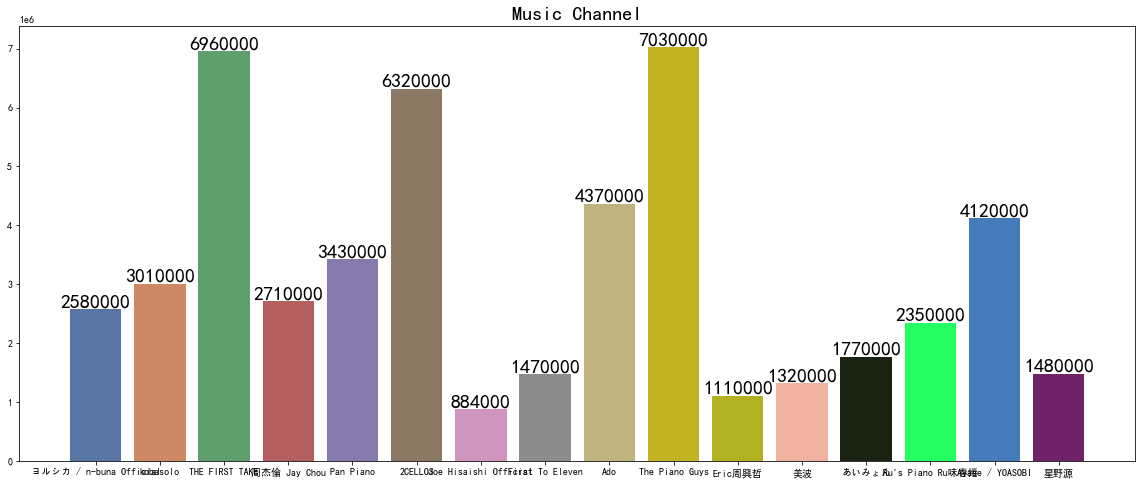

In [13]:
get_barplot(channel_data['ChannelTitle'], channel_data['Subscribers']) 

## 查看目前總觀看人數

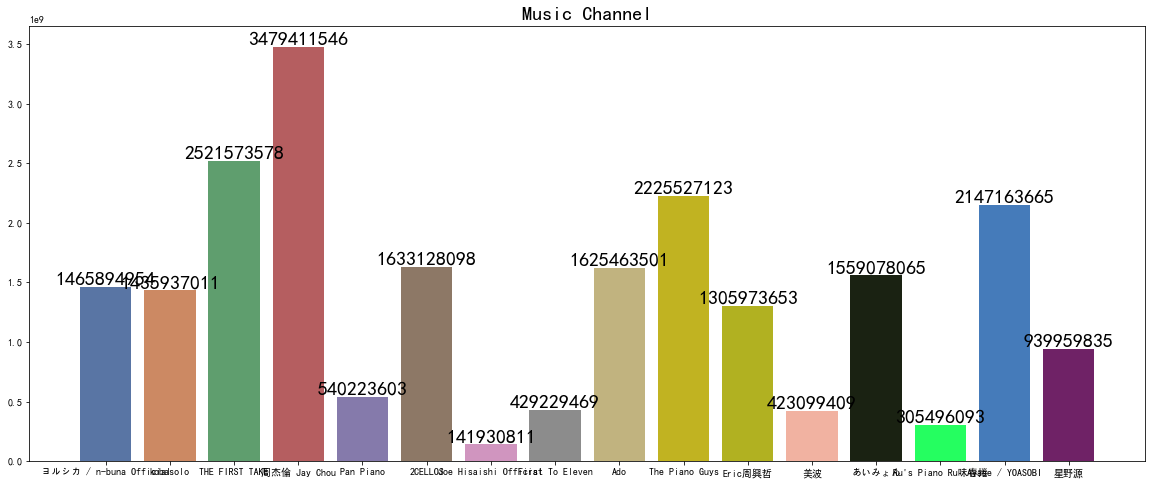

In [14]:
get_barplot(channel_data['ChannelTitle'], channel_data['TotalViews'])

## 查看頻道上傳影片數量

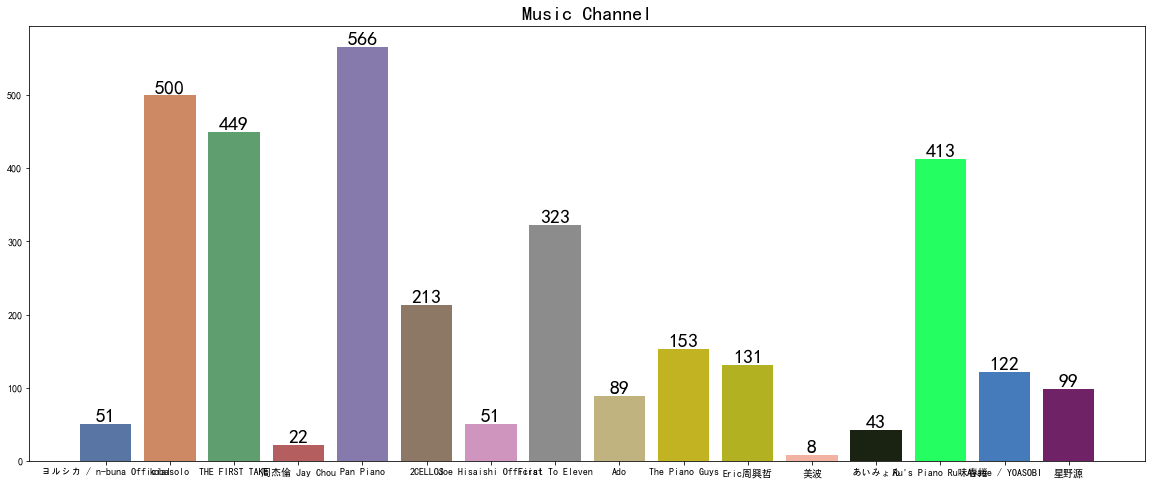

In [15]:
get_barplot(channel_data['ChannelTitle'], channel_data['VideoCount']) 